In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import os
# dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/BostonHousing.csv')
dataset= pd.read_csv('C:/Users/anju8/OneDrive/Desktop/Program/python/dataScienceProject/model run/data/BostonHousing.csv') 
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [43]:
dataset.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Preparing dataste

In [44]:
dataset=dataset.rename(columns={dataset.columns[13]:'price'})

In [45]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [47]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [48]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

correlation-  a statistical measure that expresses the extent to which two variables are linearly related.

more it is close to 1 more it is highly correlated.

if there is high collineatity between independent features we can remove them (multicollinearity)

In [49]:
dataset.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [50]:
import seaborn as sns
sns.pairplot(dataset)

Output hidden; open in https://colab.research.google.com to view.

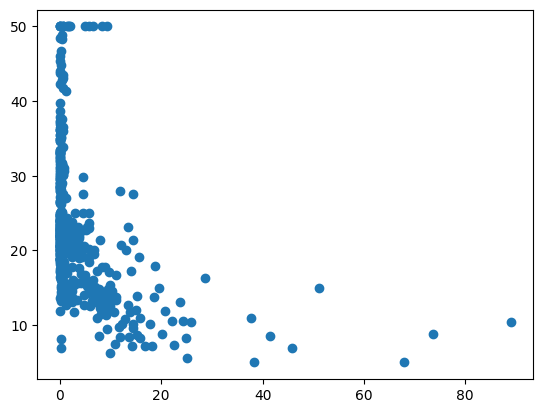

In [51]:
plt.scatter(dataset['crim'],dataset['price'])

<Axes: xlabel='rm', ylabel='price'>

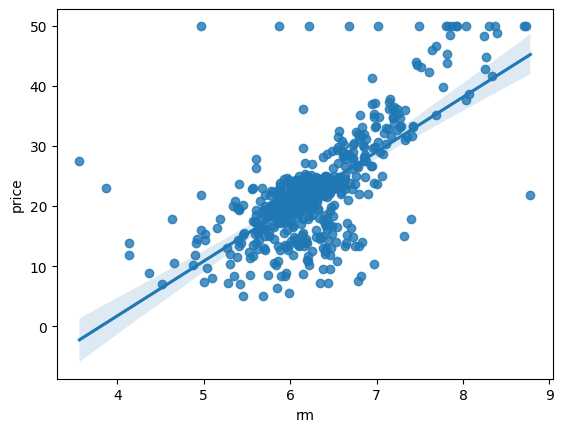

In [52]:
import seaborn as sns
sns.regplot(x="rm",y="price",data=dataset)

train test

In [53]:
X=dataset.drop('price',axis=1)
y=dataset['price']
##or
# X=dataset.iloc[:,:-1]
# y=dataset.iloc[:,-1]

In [54]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [55]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=42)

In [57]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13


In [58]:
y_train.head()

4      36.2
256    44.0
453    17.8
100    27.5
226    37.6
Name: price, dtype: float64

In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [60]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [61]:
X_test

array([[-0.49569417, -0.51775829, -1.02751276, ..., -0.81571813,
         0.42650838, -0.46182569],
       [-0.50207393,  1.34481471, -0.6710963 , ..., -0.36699887,
         0.4421702 , -1.30914772],
       [-0.49317403, -0.51775829,  2.55024396, ...,  0.75479929,
         0.36621035,  0.92679825],
       ...,
       [-0.50119839,  0.41352821, -1.13624998, ..., -1.57854089,
         0.22033164, -1.38911278],
       [-0.50356327,  3.2073877 , -1.08943257, ..., -0.90546199,
         0.39731026, -0.84165971],
       [ 1.4435851 , -0.51775829,  1.09437335, ...,  0.79967122,
        -3.75665308,  2.11397177]])

# Model Training

In [62]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [63]:
print(regression.coef_)

[-0.58946835  0.17933117  0.39088283  1.00568698 -1.49391244  3.65787047
 -0.9515434  -2.20792408  0.73320066 -0.28100285 -2.28415304  1.18619394
 -2.47020722]


In [64]:
print(regression.intercept_)

22.99801324503311


In [65]:
## parametrs on whoch model is trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [66]:
reg_pred=regression.predict(X_test)
reg_pred

array([27.6044582 , 36.13782505, 17.69219527, 25.47225984, 18.5826659 ,
       23.3452205 , 17.58616947, 15.67793578, 21.77080011, 20.28616494,
       25.32342898, 19.12549622, -6.48945175, 22.74271293, 17.84417808,
       26.48472147, 19.09439798,  5.08150302, 40.48665475, 17.20820455,
       26.72800089, 29.08885824, 10.99940021, 23.83280829, 16.82307007,
       14.1061069 , 23.2257152 , 14.77065842, 22.79843341, 18.91272099,
       20.57964572, 24.69705617, 25.96499366, 15.42865053, 16.18306171,
       17.50166879, 31.36415341, 19.05301647, 24.95146174, 25.58964026,
       13.96666622, 29.66332405, 42.05665506, 17.7549447 , 26.57609443,
       15.7422761 , 12.99546022, 26.96358183, 19.76386244, 29.76131623,
       21.26359435, 33.98900314, 15.75891889, 25.97510358, 39.56977414,
       22.70167518, 18.24047185, 30.86858554, 24.90516188, 12.73255908,
       22.9305001 , 30.10185541, 31.10238678, 15.23660594, 21.80578338,
       16.8380212 , 20.08657225, 25.41271259, 29.28926744, 11.06

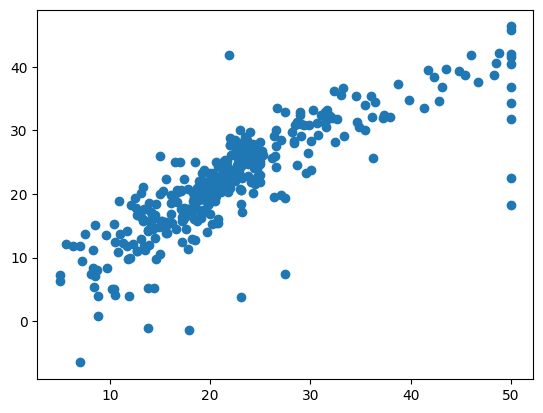

In [67]:
plt.scatter(y_test,reg_pred)

In [68]:
## reesiduals
residual = y_test-reg_pred
residual

173   -4.004458
274   -3.737825
491   -4.092195
72    -2.672260
452   -2.482666
         ...   
391    5.972617
206    0.335636
282    4.113901
254   -1.317008
416   -6.277970
Name: price, Length: 355, dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

25.692433161205745
3.360380303331749
5.068770379609412


R2 and asjusted R2

R2= 1- sum of square residual/ 1- sum of square total

adjusted R2= 1-[(1-R2)*(n-1)/(n-k-1)]

n=no. of obs, k= no. of prediction

adjested is always less than r2

In [70]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,reg_pred)
r2_score

0.7007474180149313

In [71]:
1-(((1-r2_score)*(len(reg_pred)))/(len(reg_pred)-X_test.shape[1]-1))

0.6884613882560136

New data prediction

In [72]:
# print(dataset.iloc[0])
print(dataset.drop('price',axis=1).values[:1].shape)
# print((dataset.drop('price',axis=1).values[:1].reshape(1,-1)).shape)

(1, 13)


In [73]:
z=scaler.transform(dataset.drop('price',axis=1).values[:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [74]:
regression.predict(z)

array([29.76131623])

# **PICKLING THE MODEL FILE FOR DEPLOYMENT**

pickle : the process of converting a Python object into a byte stream to store it in a file/database

pickle.dump() : helps us to make a pickle file for regression model

In [3]:
import pickle
# pickle.dump(regression,open('/content/drive/MyDrive/Colab_Notebooks/lenet_colab/regression.pkl','wb'))
# pickled_model=pickle.load(open('/content/drive/MyDrive/Colab_Notebooks/lenet_colab/regression.pkl','rb'))
pickle.dump(regression,open('C:/Users/anju8/OneDrive/Desktop/Program/python/dataScienceProject/endtoendMLProjects/bostonhousepricing/regression.pkl','wb'))
pickled_model=pickle.load(open('C:/Users/anju8/OneDrive/Desktop/Program/python/dataScienceProject/endtoendMLProjects/bostonhousepricing/regression.pkl','rb'))

In [76]:
pickled_model.predict(scaler.transform(dataset.drop('price',axis=1).values[:1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.76131623])